In [1]:
import pandas_datareader
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
from datetime import datetime
yf.pdr_override()

# in pandas_datareader we have lots of data

In [2]:
df=pdr.get_data_yahoo('AAPL')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-04-30,173.330002,174.990005,170.000000,170.330002,170.330002,65934800
2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100
2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900


# simple moving average

<Axes: xlabel='Date'>

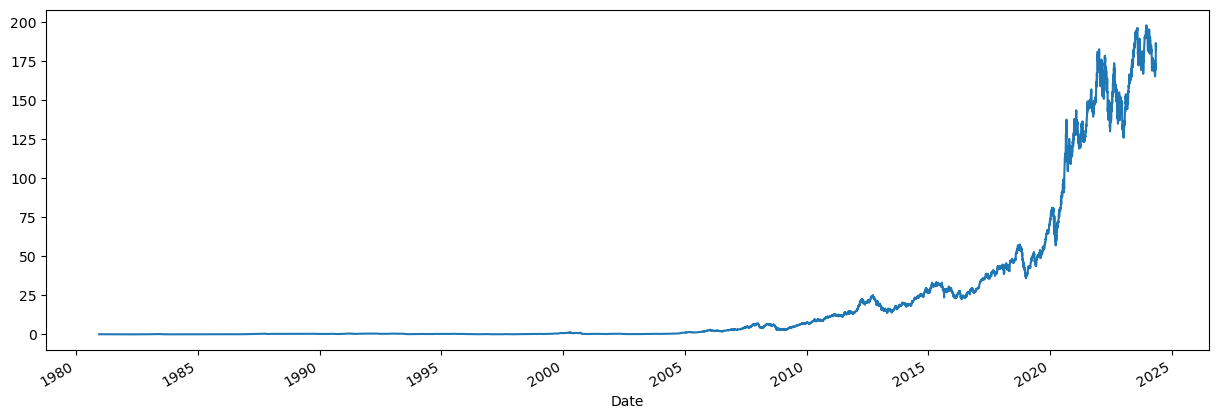

In [3]:
df['Open'].plot(figsize=(15,5))
# Lot of zigzag is present

In [4]:
df['Open:10 days rolling']=df['Open'].rolling(window=10,min_periods=1).mean()
# minimum period =1 means , the first value of the new column will  not be nan as it is(n-1)
# minimum period =5 means , the top 4  values of the new column will be nan as it is(n-1)
# other wise if we simply give window size(5) , then the first 4 value of new column will be nan 

In [5]:
df.head(6)

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,0.128348
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,0.125279
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000,0.121280
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600,0.119838
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600,0.119643
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097467,48630400,0.120722


<Axes: xlabel='Date'>

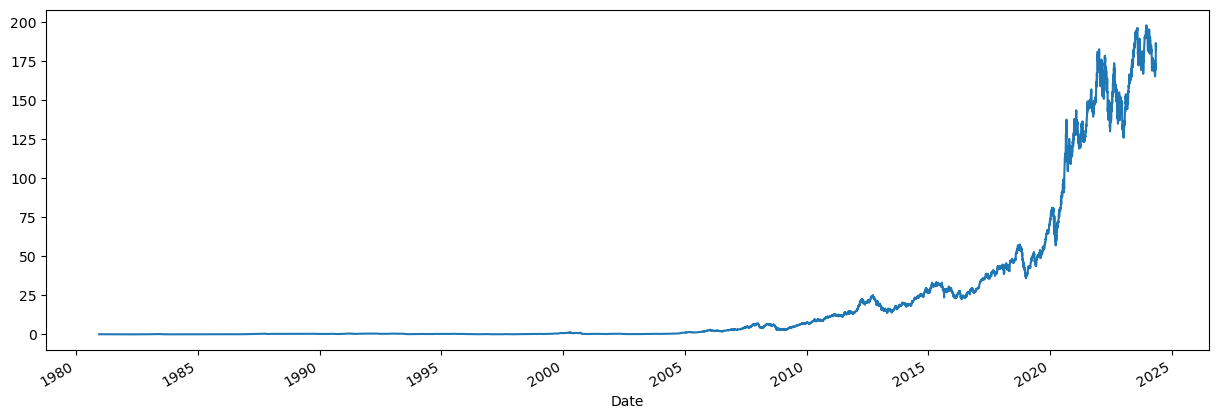

In [6]:
df['Open'].plot(figsize=(15,5))
# more distored

<Axes: xlabel='Date'>

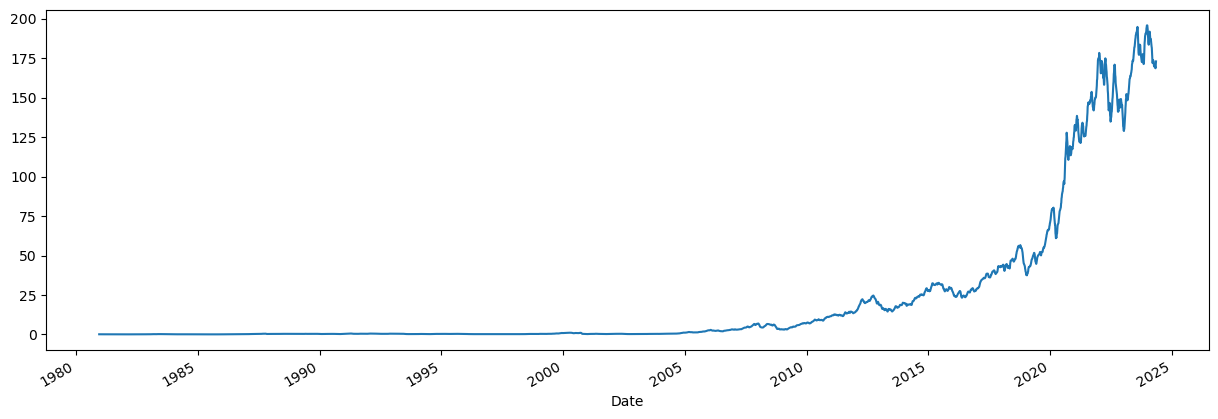

In [7]:
df['Open:10 days rolling'].plot(figsize=(15,5))
# use x limit
# less distorted as mean is taken

<Axes: xlabel='Date'>

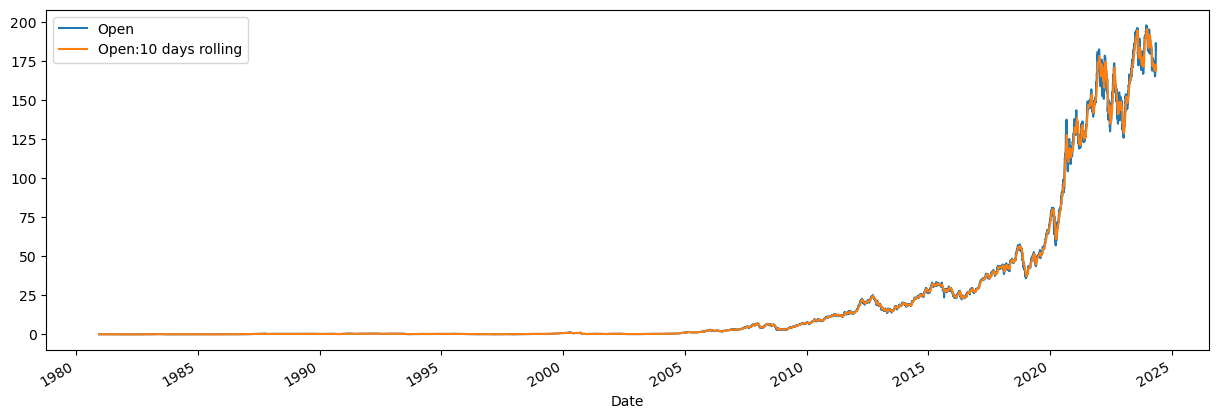

In [8]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,5))
# if we see a closer image then we will getan idea when to start and when to end
# zoom in and see the changes, when to buy and when to sell
# simple moving average (smoothing method), it is used in stock market to decide when to buy and when to sell
# we should create many number of roliing window

In [9]:
df['Open:100 days rolling']=df['Open'].rolling(window=100,min_periods=1).mean()


<Axes: xlabel='Date'>

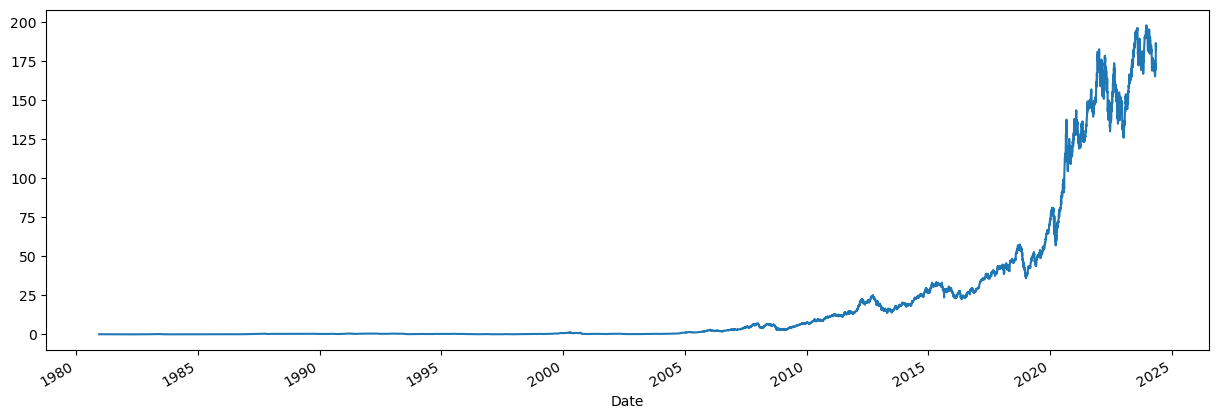

In [10]:
df['Open'].plot(figsize=(15,5))

<Axes: xlabel='Date'>

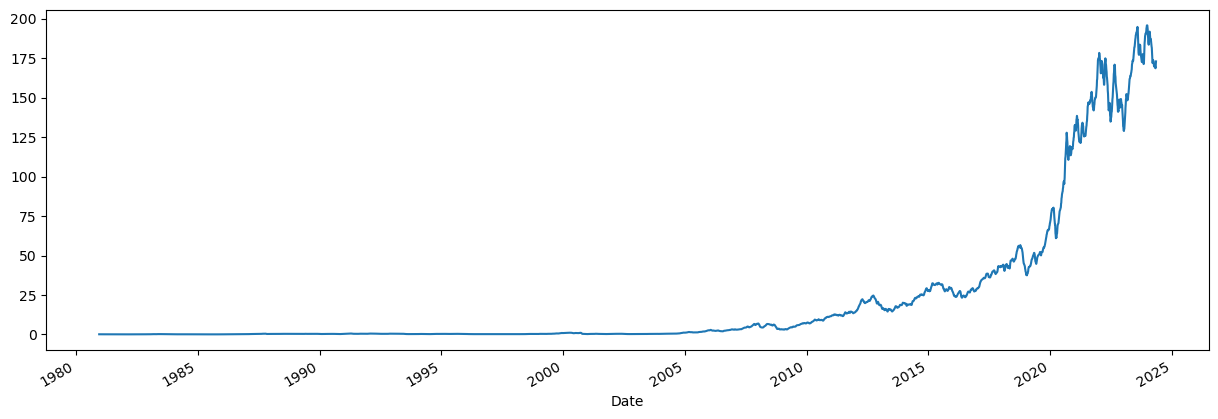

In [11]:
df['Open:10 days rolling'].plot(figsize=(15,5))

<Axes: xlabel='Date'>

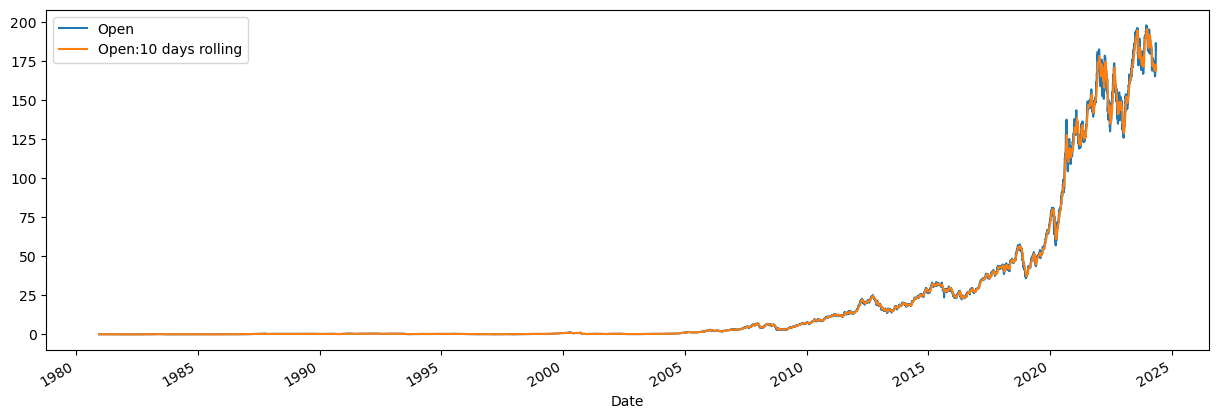

In [12]:
df[['Open','Open:10 days rolling']].plot(figsize=(15,5))

# Disadvantage of simple moving average
1. Giving similar importance to all the data ie.e doing the mean, same formula to all the data point based on the window size
2. in time series data we should focus on recent data and based on that we should do the following predictions

## what should be done:-
I want to give more importance to the recent data i.e. weights and that weight is provided by some parameter 

# Cumulative moving average

In [13]:
# Directly use expanding
# expanding- Provide expanding window calculations
df['Cumulative MA']=df['Open'].expanding().mean()

In [14]:
df.head(2)
# check the last 3 column properly

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling,Open:100 days rolling,Cumulative MA
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,0.128348,0.128348,0.128348
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,0.125279,0.125279,0.125279


<Axes: xlabel='Date'>

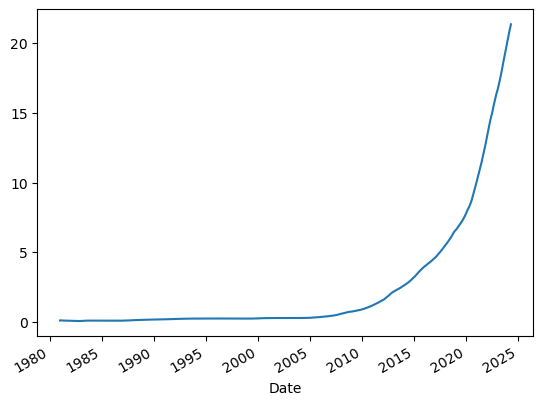

In [15]:
df['Cumulative MA'].plot()

<Axes: xlabel='Date'>

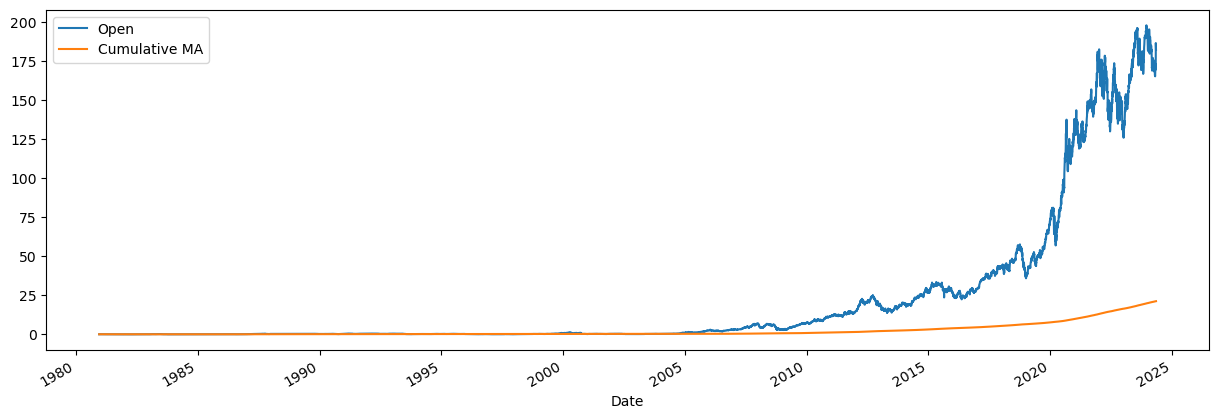

In [16]:
df[['Open','Cumulative MA']].plot(figsize=(15,5))

# EMA- Exponential  Moving Average


In [17]:
# Let the smoothing factor -0.1
df['EMA_0.1']=df['Open'].ewm(alpha=0.1,adjust=False).mean()
# ewm- Provide exponentially weighted (EW) calculations.
# alpha:-It is a hyper parameter and smoothing parameter
# play with the parameter
# Adjust check the documentation(right click)

In [18]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling,Open:100 days rolling,Cumulative MA,EMA_0.1
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,0.128348,0.128348,0.128348,0.128348
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,0.125279,0.125279,0.125279,0.127734


<Axes: xlabel='Date'>

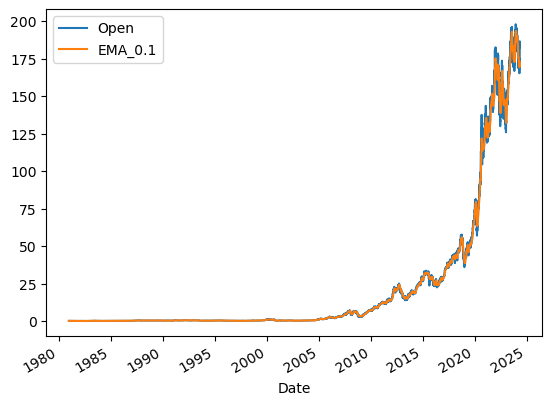

In [19]:
df[['Open','EMA_0.1']].plot()

# Advantage:-
- We are removing lags
- we are also finding the exponential moving average


# EWMA
-> Our focus should be more on the current and followed by upcoming data, so to do the projection

In [20]:
# Let the smoothing factor -0.1
df['EMWA']=df['Open'].ewm(span=5).mean()
# Emwa value is dreasing because of weights for smoothing

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open:10 days rolling,Open:100 days rolling,Cumulative MA,EMA_0.1,EMWA
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600,0.128348,0.128348,0.128348,0.128348,0.128348
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800,0.125279,0.125279,0.125279,0.127734,0.124665
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000,0.121280,0.121280,0.121280,0.126289,0.119273
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600,0.119838,0.119838,0.119838,0.125211,0.117711
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600,0.119643,0.119643,0.119643,0.124576,0.118153


<Axes: xlabel='Date'>

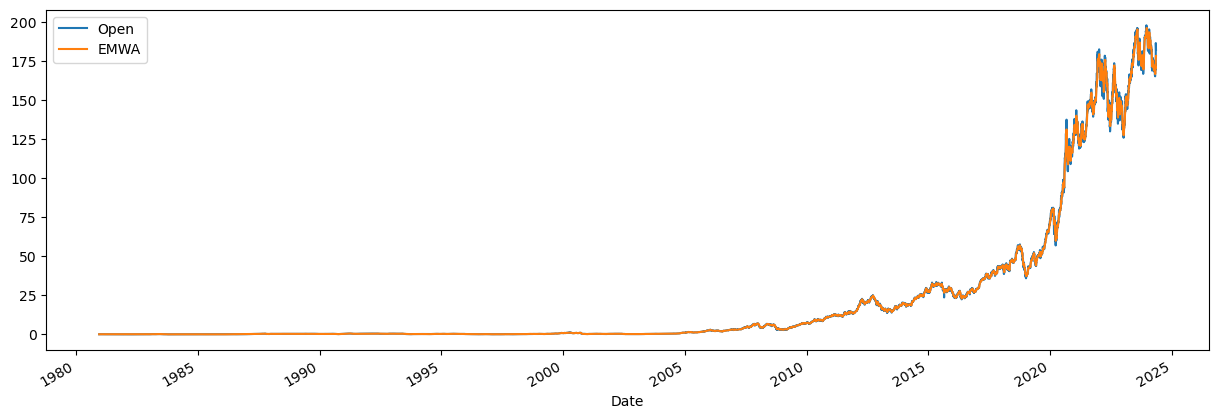

In [25]:
df[['Open','EMWA']].plot(figsize=(15,5))
# less lag

<Axes: xlabel='Date'>

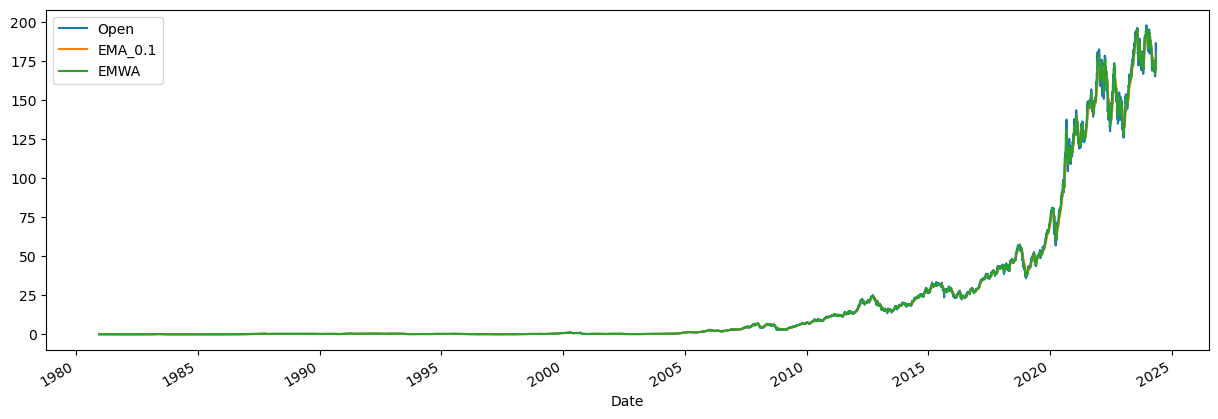

In [24]:
df[['Open','EMA_0.1','EMWA',]].plot(figsize=(15,5))

In [ ]:
# Exponential weighted moving average is best